## Coding Exercise #0404

### 1. Dimensional reduction with PCA:

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os

import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(X_train[4], cmap='gray')
# image of number 9
X = np.array(X_train[4])

%matplotlib inline

#### 1.1. Read in data and explore:

In [70]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.   
print(os.getcwd())

G:\My Drive\samsung\code\04_Ch 06


In [71]:
# df = pd.read_csv('number_nine.csv', header='infer')
# df.shape
# df.head(5)

#### 1.2. Visualize the data:

In [72]:
# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

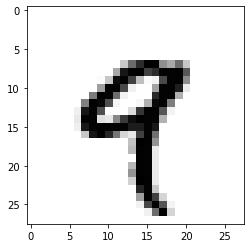

In [73]:
# X = np.array(df)
# print(X)
ShowMe(X)

#### 1.3. Visualize the reduced dimensional input by PCA:

In [74]:
# Define a function that returns reduced dimensional input.
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC)                           # Define a PCA object for a given number of target PCs. 
    X_pca = pca.fit_transform(X)                            # Get the transformed scores.
    return pca.inverse_transform(X_pca)                     # Bring back the transformed scores to the original coordinate system.

N# of PCs = 23


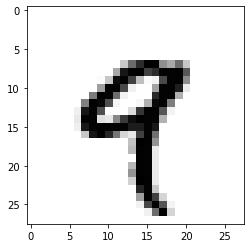

N# of PCs = 10


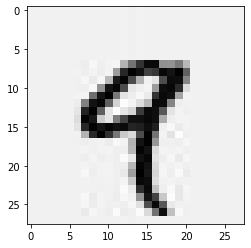

N# of PCs = 5


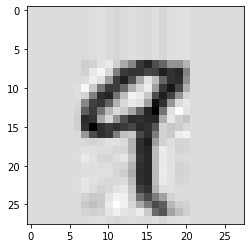

N# of PCs = 3


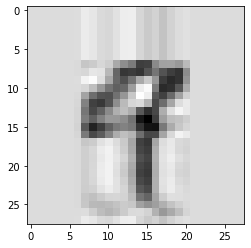

N# of PCs = 1


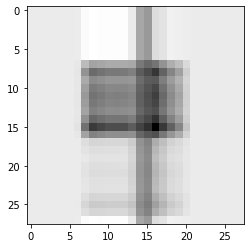

In [75]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

#### 1.4. Analysis of the cumulative variance ratio (CVR):

In [76]:
pca = PCA(n_components = 23)                          # Define a PCA object.
pca.fit(X)                                            # Train with the data.

PCA(n_components=23)

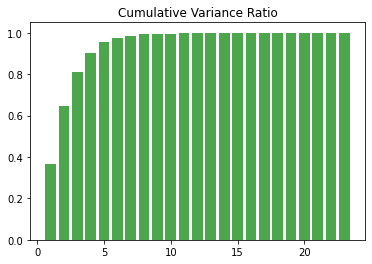

In [77]:
# Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_)        # Calculate the CVRs.
nPCs = np.arange(23)+1                                 # Define an array that corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()

### 2. Dimensional reduction with NMF:

NMF (Non-negative Matrix Factorization) is applicable for data matrix that contains only non-negative values.<br>
Similar to PCA, we can do dimensional reduction and obtain reduced dimensional input using NMF. <br>
We notice that we get a bit less 'noisy' images compared to the result of PCA.<br>
More information at [Wikipedia](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization).

#### 2.1. Visualize the reduced dimensional input by NMF:

In [78]:
# Define a function that returns reduced dimensional input.
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0, max_iter=800)      # Define a NMF object for a given number of target components.
    X_nmf = nmf.fit_transform(X)                                  # Get the transformed scores.        
    return nmf.inverse_transform(X_nmf)                           # Bring back the transformed scores to the original coordinate system.

N# of Components = 23


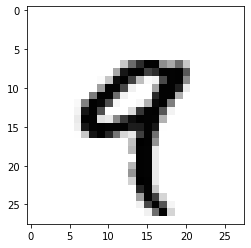

N# of Components = 10


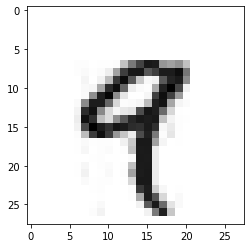

N# of Components = 5


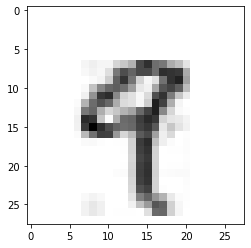

N# of Components = 3


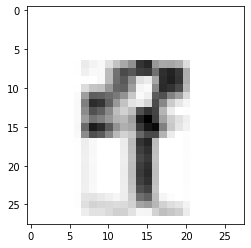

N# of Components = 1


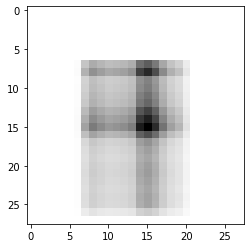

In [79]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)

### 3. Optimized high dimensional visualiztion with PCA:

#### 3.1. Simulate data:

In [80]:
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5, random_state=123)
X.shape

(150, 8)

In [81]:
# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])

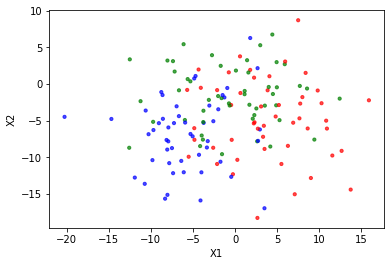

In [82]:
# Visualize on the X1 vs X2 plane. X1 ==> column 0,  X2 ==> column 1.  
# We can hardly tell the clusters apart! 
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

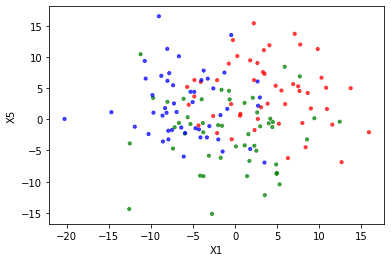

In [83]:
# Visualize on the X1 vs X5 plane. X1 ==> column 0,  X5 ==> column 4.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

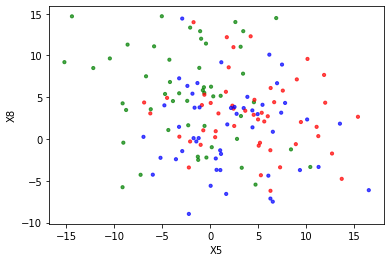

In [84]:
# Visualize on the X5 vs X8 plane. X5 ==> column 4,  X8 ==> column 7.  
# We can hardly tell the clusters apart!
# The clusters largely overlap.
plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

#### 3.2. Visualize on the plane defined by PC1 and PC2:

In [85]:
# Only 2 first PCs are needed. 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

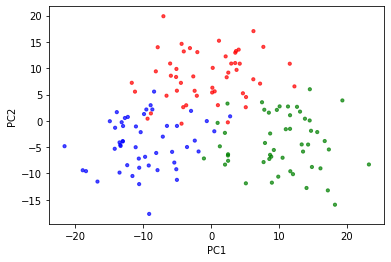

In [86]:
# Visualize on the PC1 vs PC2 plane.
# The clusters overlap the least!
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()